In [19]:
%load_ext autoreload
%autoreload 2
import os
#change current working directory to the parent directory
import sys

# Change working directory to ../.. only if not already there
if not hasattr(sys, "_parent_dir_set"):
    parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
    if os.getcwd() != parent_dir:
        os.chdir(parent_dir)
    sys._parent_dir_set = parent_dir
else:
    parent_dir = sys._parent_dir_set
# Add parent_dir to sys.path only if not already present
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

import numpy as np
from SRtools import sr_mcmc as srmc
from SRtools import deathTimesDataSet as dtds
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


 # Raw Data loading and plotting

In [20]:
rawDataFile = 'Rawfiles/Yeast_WD.xlsx'


In [21]:
selection_criteria = {}
cleanedDataFile = 'Cleaned_datasets/Yeast.csv'
cohorts = dtds.dataCollectionFromExcel(rawDataFile)

In [22]:
print(cohorts.datasets.keys())

dict_keys(['sheet:_Sheet1,index:_0', 'sheet:_Sheet2,index:_1', 'sheet:_Sheet3,index:_2', 'sheet:_Sheet4,index:_3', 'sheet:_Sheet5,index:_4', 'sheet:_Sheet6,index:_5', 'sheet:_Sheet7,index:_6', 'sheet:_Sheet8,index:_7', 'sheet:_Sheet9,index:_8', 'sheet:_Sheet10,index:_9', 'sheet:_Sheet11,index:_10', 'sheet:_Sheet12,index:_11', 'sheet:_Sheet13,index:_12', 'sheet:_Sheet14,index:_13', 'sheet:_Sheet15,index:_14', 'sheet:_Sheet16,index:_15', 'sheet:_Sheet17,index:_16', 'sheet:_Sheet18,index:_17', 'sheet:_Sheet19,index:_18', 'sheet:_Sheet20,index:_19', 'sheet:_Sheet21,index:_20', 'sheet:_Sheet22,index:_21', 'sheet:_Sheet23,index:_22', 'sheet:_Sheet24,index:_23', 'sheet:_Sheet25,index:_24', 'sheet:_Sheet26,index:_25', 'sheet:_Sheet27,index:_26', 'sheet:_Sheet28,index:_27', 'sheet:_Sheet29,index:_28', 'sheet:_Sheet30,index:_29', 'sheet:_Sheet31,index:_30', 'sheet:_Sheet32,index:_31', 'sheet:_Sheet33,index:_32', 'sheet:_Sheet34,index:_33', 'sheet:_Sheet35,index:_34', 'sheet:_Sheet36,index:_35', 

['Sheet128', 'Sheet117', 'Sheet432', 'Sheet549', 'Sheet22', 'Sheet61', 'Sheet316', 'Sheet206', 'Sheet53', 'Sheet669', 'Sheet133', 'Sheet310', 'Sheet608', 'Sheet594', 'Sheet47', 'Sheet618', 'Sheet41', 'Sheet220', 'Sheet111', 'Sheet346', 'Sheet648', 'Sheet535', 'Sheet40', 'Sheet216', 'Sheet387', 'Sheet435', 'Sheet189', 'Sheet551', 'Sheet637', 'Sheet243', 'Sheet89', 'Sheet289', 'Sheet238', 'Sheet452', 'Sheet11', 'Sheet155', 'Sheet667', 'Sheet205', 'Sheet281', 'Sheet429', 'Sheet193', 'Sheet473', 'Sheet71', 'Sheet408', 'Sheet45', 'Sheet91', 'Sheet663', 'Sheet612', 'Sheet419', 'Sheet328', 'Sheet3', 'Sheet639', 'Sheet350', 'Sheet318', 'Sheet77', 'Sheet459', 'Sheet418', 'Sheet617', 'Sheet154', 'Sheet287', 'Sheet510', 'Sheet210', 'Sheet253', 'Sheet538', 'Sheet630', 'Sheet320', 'Sheet256', 'Sheet422', 'Sheet400', 'Sheet321', 'Sheet261', 'Sheet302', 'Sheet544', 'Sheet324', 'Sheet502', 'Sheet611', 'Sheet296', 'Sheet182', 'Sheet49', 'Sheet646', 'Sheet172', 'Sheet107', 'Sheet461', 'Sheet658', 'Sheet

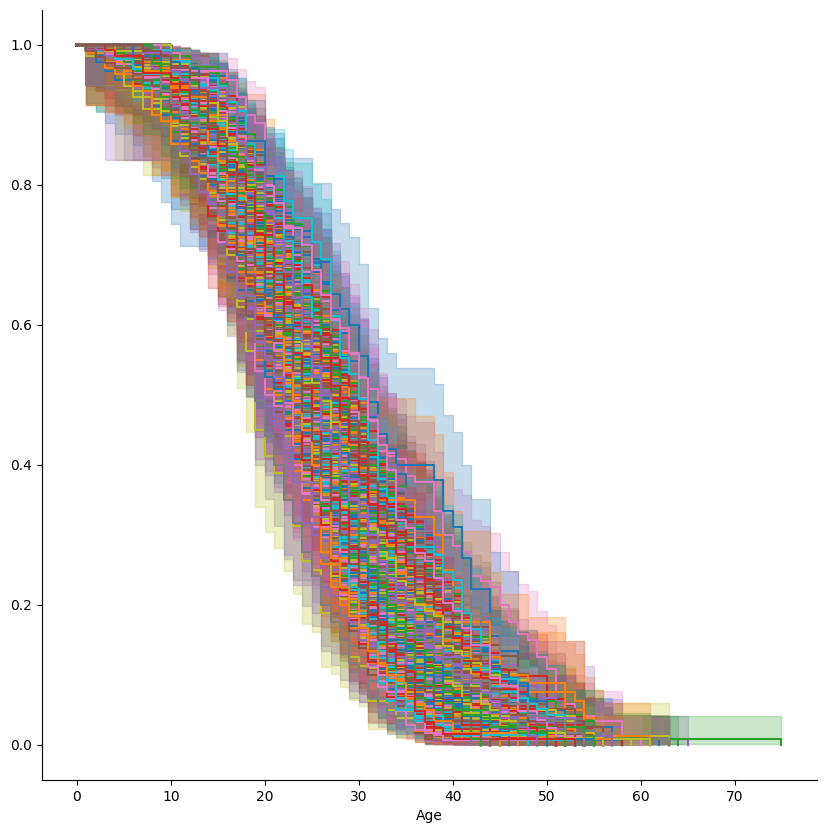

In [23]:
prop = 'sheet'
prop_values =[]
for dataset in cohorts.datasets.values():
    prop_values.append(dataset.properties[prop][0])
prop_values = list(set(prop_values))
print(prop_values)
fig, ax = plt.subplots(1,1,figsize=(10,10))
for value in prop_values:
    cohort=cohorts.get_combined_dataset(properties=[prop],values=[value])
    cohort.plotSurvival(ax=ax,label=f"{value}, n={cohort.n}")
ax.legend().set_visible(False)


# Choosing only relevant cohorts and sanity checking
We aggragate all the relevant cohorts (controls) and sample with the same size distribution as the original cohorts. We look to see the spread as a sanity check.
We then calculate the steepnes (ML/IQR) and longevity (ML) of each sampled and data cohorts.

In [24]:
print(list(selection_criteria.values()))

[]


In [25]:
agragated_cohort = cohorts.get_combined_dataset(properties=list(selection_criteria.keys()),values=list(selection_criteria.values()))
print(agragated_cohort.n)

27628


In [26]:
selected_cohorts = cohorts.getSubset(properties=list(selection_criteria.keys()),values=list(selection_criteria.values()))
print(selected_cohorts.nDatasets())

676


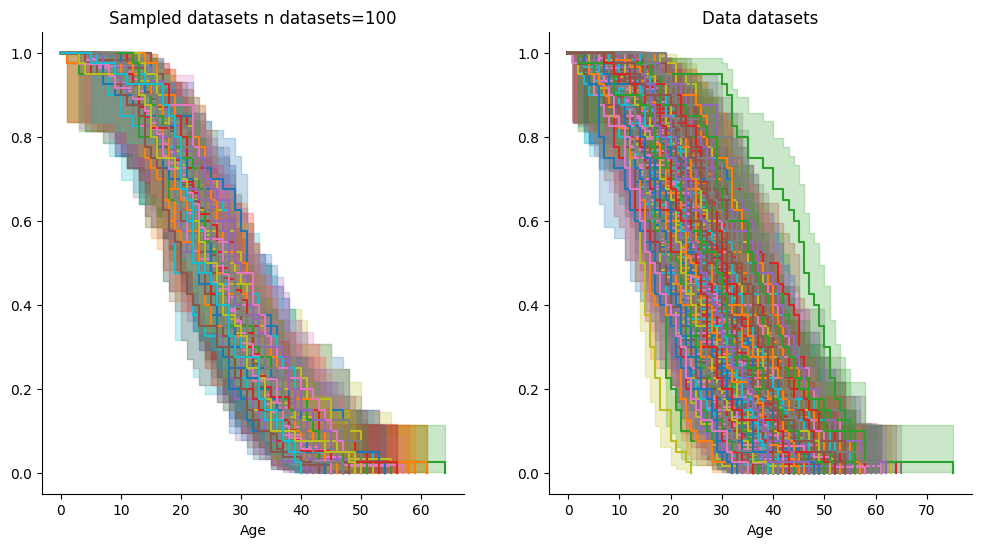

In [27]:
ax=selected_cohorts.plotSurvivalComparison()
ax[1].get_legend().set_visible(False)


<Axes: title={'center': 'Median lifetime vs Steepness Data and sampled datasets'}, xlabel='Median lifetime', ylabel='Steepness'>

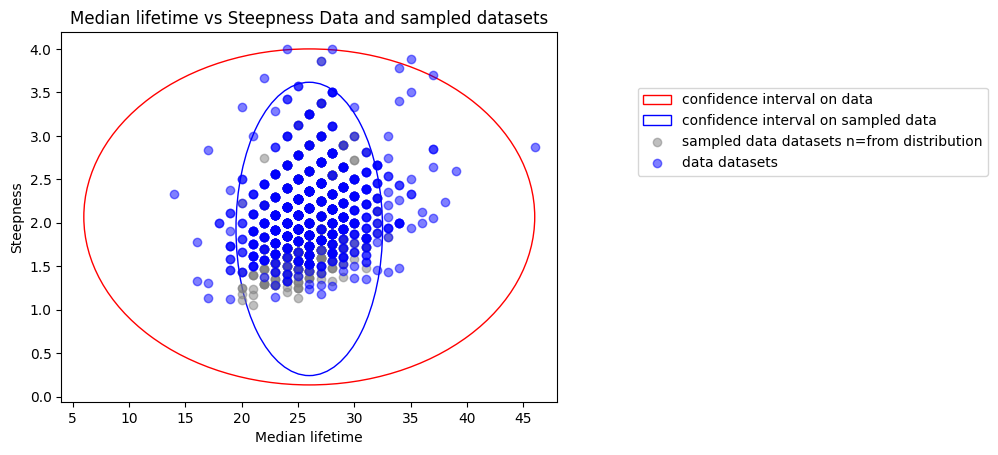

In [28]:
selected_cohorts.drawConfidenceEllipse(data_percentile=100,sampled_percentile=99.9)

# Cleaning outliers 
We remove outliers that are outside the sampled cohorts confidence interval  (we do each axis saparately so the elipses are a bit missleading). We the replot the spreads of the cleaned data vs sampled data (we smaple from the cleaned cohorts)

In [29]:
cleaned_cohorts = selected_cohorts.clean_DatasetCollection(n_samples=1000,sampled_percentile=99.9)

Removing dataset sheet:_Sheet10,index:_9 with median lifetime 18.0 and steepness 2.0
Removing dataset sheet:_Sheet12,index:_11 with median lifetime 19.0 and steepness 1.7272727272727273
Removing dataset sheet:_Sheet22,index:_21 with median lifetime 19.0 and steepness 1.5833333333333333
Removing dataset sheet:_Sheet25,index:_24 with median lifetime 28.0 and steepness 4.0
Removing dataset sheet:_Sheet43,index:_42 with median lifetime 17.0 and steepness 2.8333333333333335
Removing dataset sheet:_Sheet47,index:_46 with median lifetime 19.0 and steepness 2.111111111111111
Removing dataset sheet:_Sheet64,index:_63 with median lifetime 33.0 and steepness 2.357142857142857
Removing dataset sheet:_Sheet67,index:_66 with median lifetime 34.0 and steepness 2.0
Removing dataset sheet:_Sheet70,index:_69 with median lifetime 19.0 and steepness 1.7272727272727273
Removing dataset sheet:_Sheet104,index:_103 with median lifetime 33.0 and steepness 2.2
Removing dataset sheet:_Sheet121,index:_120 with me

<Axes: title={'center': 'Median lifetime vs Steepness Data and sampled datasets'}, xlabel='Median lifetime', ylabel='Steepness'>

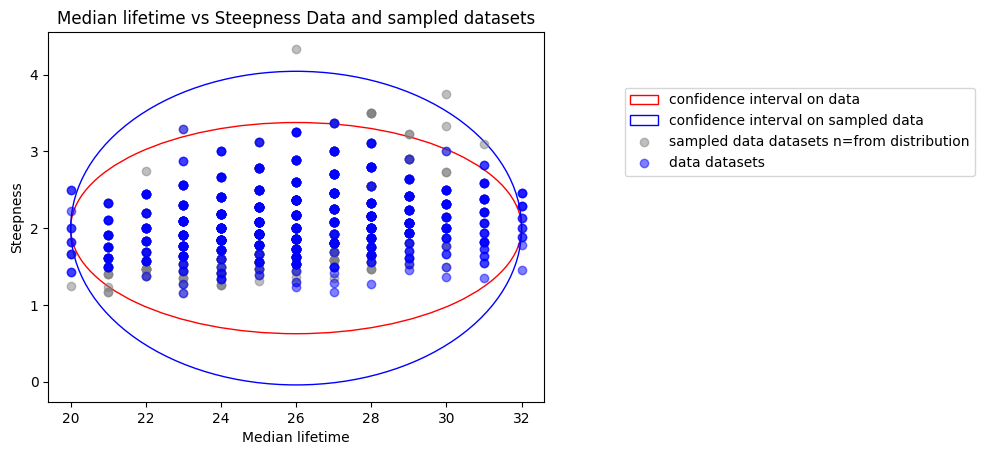

In [30]:
cleaned_cohorts.drawConfidenceEllipse(data_percentile=100,sampled_percentile=99.9)

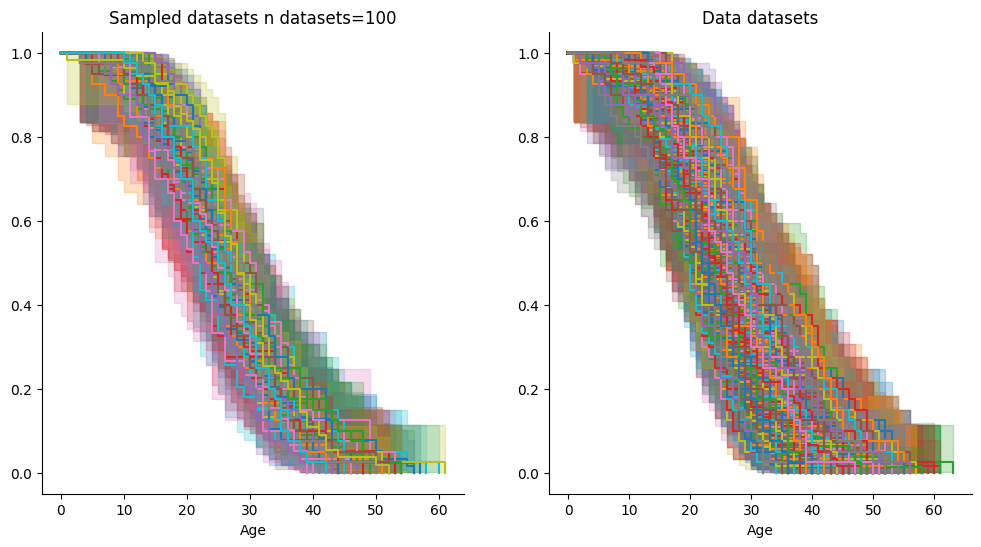

In [31]:
ax=cleaned_cohorts.plotSurvivalComparison()
ax[1].get_legend().set_visible(False)




In [32]:
combined_cleaned_cohorts = cleaned_cohorts.get_combined_dataset()
print(combined_cleaned_cohorts.n)

24512


In [33]:
combined_cleaned_cohorts.toCsv(cleanedDataFile)